In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("C:\\Users\\nikhi\\Downloads\\Polynomial_train.csv")
data
data_test=pd.read_csv("C:\\Users\\nikhi\\Downloads\\Polynomial_test.csv")
data_test

,Unnamed: 0,X,Y,Z,label
0,0,9.322078,0.413096,5.984731,-657.669309
1,1,2.811964,6.142752,6.419237,-545.362524
2,2,-2.669784,7.775091,-6.931907,-75.044187
3,3,-6.992156,-9.205548,0.852580,-2403.124902
4,4,1.574294,-2.213266,6.029188,8.595325
...,...,...,...,...,...
9995,9995,-0.992449,-7.853677,7.748156,-635.006038
9996,9996,8.574451,6.271919,-5.734962,-1275.855209
9997,9997,6.640997,6.864877,4.511685,-1771.640694
9998,9998,-6.262414,1.323203,-3.917748,-22.746921


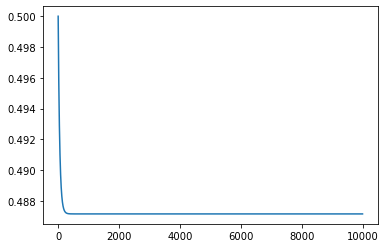

In [2]:
x_train=data.loc[:,'X':'Z']
y_train=data.loc[:,'label']
n=np.square(x_train)
x_train=np.concatenate((x_train,n),axis=1)

#Normalization
def normx(x_train):
    mean=np.mean(x_train,axis=0)
    std=np.std(x_train,axis=0)
    value=(x_train-mean)/std
    return value
x_train=normx(x_train)
y_train=normx(y_train)
m=len(x_train)
x_train=np.c_[np.ones(m), x_train]
theta=np.zeros(x_train.shape[1])

def hypothesis(x_train,theta):
    htheta=np.dot(x_train,theta)
    return htheta
def cost_function(x_train,y_train,theta):
    htheta=hypothesis(x_train,theta)
    cost=(1/(2*m))*(np.sum(np.square(htheta-y_train)))
    return cost
def gradientdescent(x_train,y_train,theta,alpha,iters):
    m=len(y_train)
    theta=np.zeros(x_train.shape[1])
    cost_arr=[]
    for i in range(iters):
        cost=cost_function(x_train,y_train,theta)
        htheta=hypothesis(x_train,theta)
        dcost=(1/m)*(np.dot(x_train.T,htheta-y_train))
        theta=theta-alpha*dcost
        cost_arr.append(cost)
    return theta,cost_arr
iters=10000
alpha=0.01
[theta,cost_arr]=gradientdescent(x_train,y_train,theta,alpha,iters)

plt.plot(cost_arr)


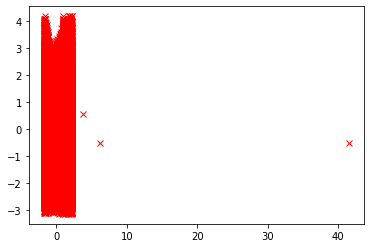

In [3]:
plt.plot(x_train,y_train,'rx')


In [4]:
#Accuracy
X_test=data_test.drop(['Unnamed: 0','label'], axis=1)
Y_test=data_test.loc[:,'label']
X_test=(X_test-X_test.mean())/X_test.std()
Y_test=(X_test-Y_test.mean())/Y_test.std()
M=len(X_test)
X_test=np.c_[np.ones(M), X_test]
Y_test=np.c_[np.ones(M), Y_test]
X_mean=np.mean(X_test)
Y_mean=np.mean(Y_test)
numer=0
denom=0
for i in range(M):
    numer+=(X_test[i]-X_mean)*(Y_test-Y_mean)
    denom+=(X_test[i]-X_mean)**2
b1=numer/denom
b0=Y_mean-(b1*X_mean)
b2=(Y_mean-(b1*X_mean)-b0)/(X_mean**2)
y_pred=b0+b1*X_test[i]+b2*(X_test[i])**2

rmse = np.sqrt(np.sum(np.square(y_pred - Y_test))/m)
Accuracy=(1-rmse)*100
print(Accuracy)


78.59432149404275
